In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [3]:
file_names = [
    "/home/eharpu/shannon/Plotting/combined_df_chr1.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr2.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr3.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr4.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr5.csv",  
]


df1 = pd.read_csv(file_names[0])
df2 = pd.read_csv(file_names[1])
df3 = pd.read_csv(file_names[2])
df4 = pd.read_csv(file_names[3])
df5 = pd.read_csv(file_names[4])


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)



In [5]:
#combined_df.to_csv("combined_df_All.csv")
combined_df = pd.read_csv("combined_df_All.csv", low_memory=False)

In [19]:
combined_df = combined_df.drop("Unnamed: 0", axis=1)

In [20]:
combined_df = combined_df.rename(columns=lambda x: '-'.join(x.split('-')[::-1]).replace('CpG', 'CG'))

print(combined_df.columns)


row_labels = [
    'CHG-rosette',
    'CHH-rosette',
    'CHG-endosperm',
    'CHH-endosperm',
    'CHG-embryo',
    'CHH-embryo',
    'CHG-buds-flower-immature',
    'CHH-buds-flower-immature',
    'CHH-shoot',
    'CHH-root',
    'CHH-organism-whole',
    'CHH-inflorescence',
    'CHH-cell-sperm',
    'CHH-nucleus-vegetative',
    'CHG-cell-sperm',
    'CHG-nucleus-vegetative',
    'CHG-inflorescence',
    'CHG-root',
    'CHG-shoot',
    'CHG-organism-whole',
    'CHG-part-aerial',
    'CHH-part-aerial',
    'CG-part-aerial',
    'CG-rosette',
    'CG-root',
    'CG-organism-whole',
    'CG-shoot',
    'CG-cell-sperm',
    'CG-nucleus-vegetative',
    'CG-buds-flower-immature',
    'CG-inflorescence',
    'CG-embryo',
    'CG-endosperm'
]

col_labels = row_labels



Index(['CHG-part-aerial', 'CHG-embryo', 'CHG-endosperm',
       'CHG-buds-flower-immature', 'CHG-inflorescence', 'CHG-root',
       'CHG-rosette', 'CHG-shoot', 'CHG-cell-sperm', 'CHG-nucleus-vegetative',
       'CHG-organism-whole', 'CHH-part-aerial', 'CHH-embryo', 'CHH-endosperm',
       'CHH-buds-flower-immature', 'CHH-inflorescence', 'CHH-root',
       'CHH-rosette', 'CHH-shoot', 'CHH-cell-sperm', 'CHH-nucleus-vegetative',
       'CHH-organism-whole', 'CG-part-aerial', 'CG-embryo', 'CG-endosperm',
       'CG-buds-flower-immature', 'CG-inflorescence', 'CG-root', 'CG-rosette',
       'CG-shoot', 'CG-cell-sperm', 'CG-nucleus-vegetative',
       'CG-organism-whole'],
      dtype='object')


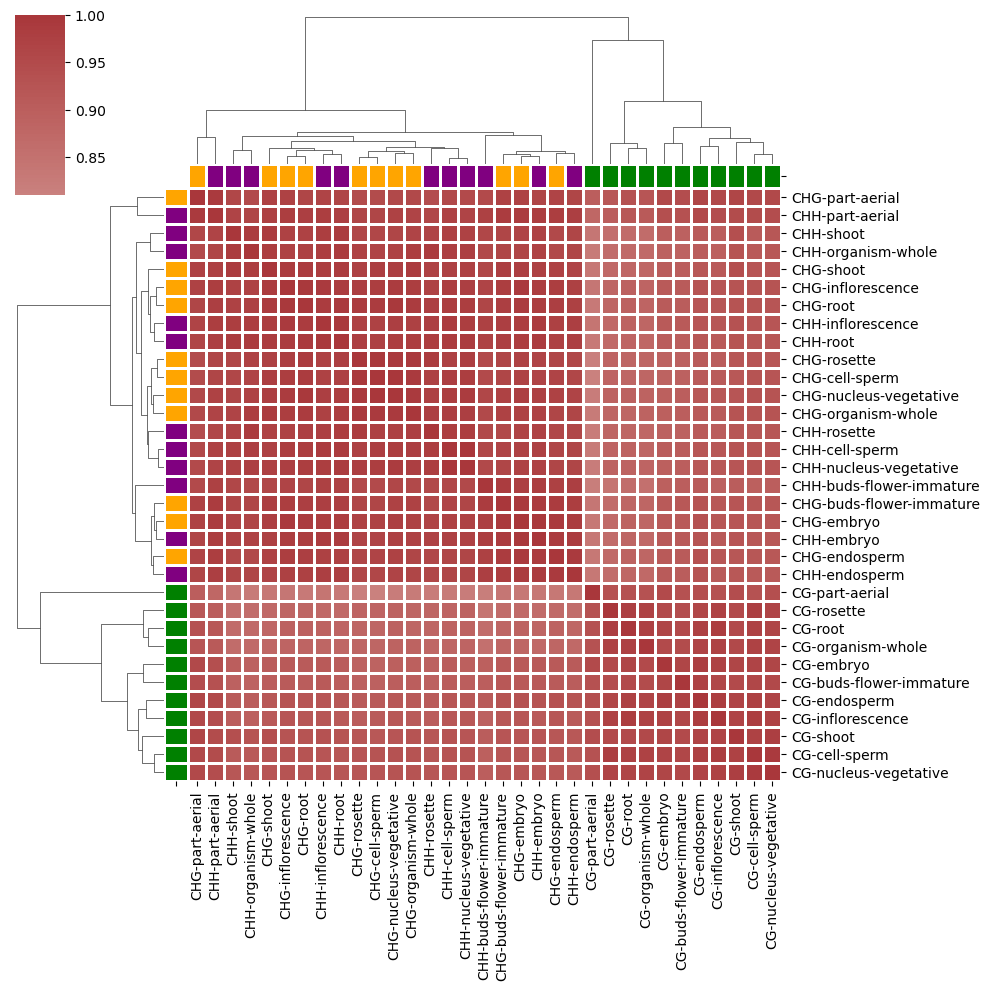

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[0])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 100000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', numeric_only = True)

#correlation_matrix[correlation_matrix <0] = correlation_matrix[correlation_matrix <0] * -1

#correlation_matrix = correlation_matrix.loc[row_labels, col_labels]


fig = sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="vlag",
                           row_colors=col_colors, col_colors=col_colors,
                           #row_linkage=row_linkage, 
                           linewidths=0.75, figsize=(10, 10))


plt.show()


In [23]:
fig.savefig("ClusterMap_All.png")

In [154]:
correlation_matrix.to_csv("corr.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 100000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman')

#correlation_matrix[correlation_matrix < 0] = correlation_matrix[correlation_matrix < 0] ** 2

#correlation_matrix = correlation_matrix.abs() 

#correlation_matrix = correlation_matrix[correlation_matrix > 0.5]

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)



fig = sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="coolwarm",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


fig.show()

In [26]:
#fig.savefig('clustermap_combined_all.jpeg')

In [10]:
correlation_matrix

,aerial-part-CHG,embryo-CHG,endosperm-CHG,immature-flower-buds-CHG,inflorescence-CHG,root-CHG,rosette-CHG,shoot-CHG,sperm-cell-CHG,vegetative-nucleus-CHG,...,embryo-CpG,endosperm-CpG,immature-flower-buds-CpG,inflorescence-CpG,root-CpG,rosette-CpG,shoot-CpG,sperm-cell-CpG,vegetative-nucleus-CpG,whole-organism-CpG
aerial-part-CHG,1.000000,0.516851,0.488891,0.416835,0.340987,2.395685e-01,-0.005359,0.477107,0.302865,0.340444,...,0.003943,0.004139,0.001505,0.001525,-8.888928e-05,-0.001541,0.006176,-0.001129,0.000318,0.000060
embryo-CHG,0.516851,1.000000,0.688631,0.572503,0.508805,3.149638e-01,-0.058179,0.698617,0.413865,0.475321,...,0.006261,0.003279,-0.001844,0.001629,2.998560e-04,-0.003880,0.007318,0.000225,-0.000162,0.000848
endosperm-CHG,0.488891,0.688631,1.000000,0.534541,0.474634,2.965461e-01,-0.049537,0.647658,0.386257,0.445259,...,0.004164,0.002596,-0.000128,0.000331,-2.751870e-03,-0.000664,0.005115,-0.002591,-0.001832,0.001679
immature-flower-buds-CHG,0.416835,0.572503,0.534541,1.000000,0.420479,2.420522e-01,0.017217,0.536520,0.312785,0.369058,...,0.004360,0.002168,0.002427,0.001079,-2.824491e-04,-0.002378,0.004928,-0.000101,0.000410,0.000285
inflorescence-CHG,0.340987,0.508805,0.474634,0.420479,1.000000,2.230463e-01,-0.031259,0.453427,0.293008,0.328352,...,0.003155,0.002155,-0.000369,0.000830,1.390115e-04,-0.002050,0.002801,-0.000353,0.000265,0.001028
root-CHG,0.239569,0.314964,0.296546,0.242052,0.223046,1.000000e+00,0.030105,0.292396,0.219316,0.229409,...,0.001916,0.001215,0.000006,0.000233,-6.603441e-07,-0.000195,0.002478,-0.001639,-0.001133,0.002385
rosette-CHG,-0.005359,-0.058179,-0.049537,0.017217,-0.031259,3.010550e-02,1.000000,-0.112176,-0.019975,-0.034124,...,-0.000065,0.000297,-0.000185,0.002342,2.754443e-03,-0.000762,-0.001274,0.000245,-0.000362,-0.001805
shoot-CHG,0.477107,0.698617,0.647658,0.536520,0.453427,2.923960e-01,-0.112176,1.000000,0.407864,0.459445,...,0.004199,0.003132,-0.003518,0.000796,3.528246e-04,-0.001702,0.005608,-0.000370,-0.001369,0.001169
sperm-cell-CHG,0.302865,0.413865,0.386257,0.312785,0.293008,2.193163e-01,-0.019975,0.407864,1.000000,0.347943,...,0.002720,0.001365,-0.000833,0.001327,9.319443e-04,-0.000010,0.002077,-0.001470,-0.001639,0.004201
vegetative-nucleus-CHG,0.340444,0.475321,0.445259,0.369058,0.328352,2.294085e-01,-0.034124,0.459445,0.347943,1.000000,...,0.002328,0.000758,-0.001003,0.000608,1.222877e-04,-0.000474,0.003470,-0.000727,-0.000406,-0.000679


In [11]:
combined_df.memory_usage(index=True).sum()

11670176320

In [12]:
combined_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 42905060 entries, 0 to 9999996
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   aerial-part-CHG           float64
 1   embryo-CHG                float64
 2   endosperm-CHG             float64
 3   immature-flower-buds-CHG  float64
 4   inflorescence-CHG         float64
 5   root-CHG                  float64
 6   rosette-CHG               float64
 7   shoot-CHG                 float64
 8   sperm-cell-CHG            float64
 9   vegetative-nucleus-CHG    float64
 10  whole-organism-CHG        float64
 11  aerial-part-CHH           float64
 12  embryo-CHH                float64
 13  endosperm-CHH             float64
 14  immature-flower-buds-CHH  float64
 15  inflorescence-CHH         float64
 16  root-CHH                  float64
 17  rosette-CHH               float64
 18  shoot-CHH                 float64
 19  sperm-cell-CHH            float64
 20  vegetative-nucleus-CHH    fl

In [13]:
11000000/50

220000.0

In [14]:
1458772.04/50

29175.4408